4.0
4.0
9.0


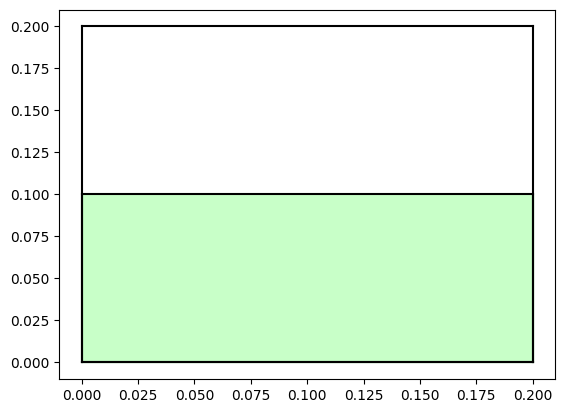

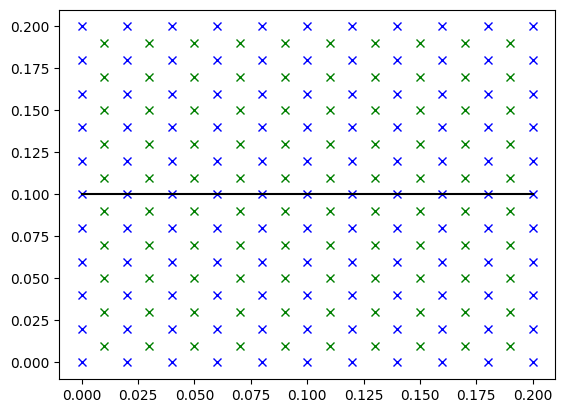

In [4]:
import fluid_fvm.physics as ph
import matplotlib.pyplot as plt
import fluid_fvm.geometry as geo
import fluid_fvm.project as pr
import fluid_fvm.mesh as ms
import fluid_fvm.discretization as dc
import numpy as np
a = geo.Assembly(base_polygon=geo.Polygon([geo.Vector(0,0),geo.Vector(0.2,0),geo.Vector(0.2,0.2), geo.Vector(0,0.2)]), 
                 polygon_list=[geo.Polygon([geo.Vector(0,0),geo.Vector(0.2,0),geo.Vector(0.2,0.1), geo.Vector(0,0.1)])])
a.assemble()
fig, ax = plt.subplots()

a.plot(ax)

mesh_c_full = ms.RectangularSnappingConfig(11,11, [geo.Line(geo.Vector(0.2,0.1), geo.Vector(0,0.1))])
mesh_c_full.constructMesh(a.base_polygon)
fig, ax = plt.subplots()

mesh_c_full.plotMesh(ax)
for line in mesh_c_full.snapLines:
    line.plot(ax)


In [ ]:
print(mesh_c_full.pP)
print(mesh_c_full.parPoints)

AttributeError: 'RectangularSnappingConfig' object has no attribute 'pP'

0.022222222222222223

1.0
0.0
1.0
6
[0.0, 1.055, 2.11, 3.3, 4.15, 5.0]
[2.11, 3.3]


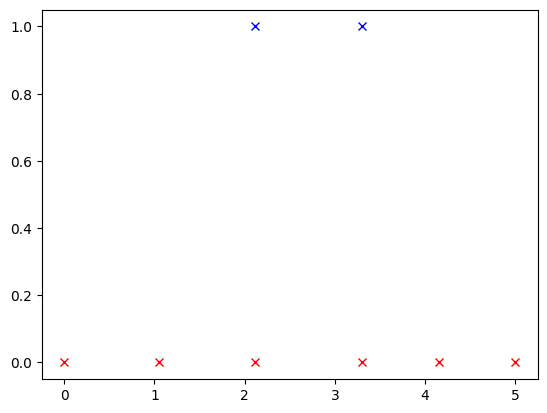

In [ ]:
def findXpoints(fxNum, length, snapPoints):
    meshpoints = [0.0]
    covered_length = 0.0
    all_points = fxNum-2
    snapPoints=snapPoints+[length]
    for sp in snapPoints:
        print(np.floor((sp-covered_length)/(length-covered_length)*all_points))
        meshpoints.extend(np.linspace(covered_length, sp, int(np.floor((sp-covered_length)/(length-covered_length)*all_points))+2)[1:-1].tolist())
        meshpoints.append(sp)
        all_points = all_points-np.floor((sp-covered_length)/(length-covered_length)*all_points)-1
        covered_length = sp

    return meshpoints
snapPoints = [0.2,0.2]
mps = findXpoints(10, 0.2, snapPoints)
print(len(mps))
print(mps)

fig, ax = plt.subplots()
print(snapPoints)
ax.plot(mps, np.zeros(np.size(mps)), "rx")
ax.plot(snapPoints, np.ones(np.size(snapPoints)),"bx")

[5, 9, 8, 11, 45]